# gGnome
Reference-based graph representation of structurally altered genome employing GenomicRanges framework.

## Install
```{r}
library(devtools)
install_github("mskilab/gGnome")
```

## Dependencies
* GenomicRanges
```{r}
source("http://bioconductor.org/biocLite.R")
biocLite("GenomicRanges")
```

* BSgenome
```{r}
biocLite("BSgenome")
```
* igraph
```{r}
install.packages("igraph")
```

* skitools
```{r}
install_github("mskilab/skitools")
```

* gTrack
```{r}
install_github("mskilab/gTrack")
```

## Quick start
```{r}
library(gGnome)
```

* Creating a default gGraph object based on the reference genome. As shown below, the reference genome used is stored in an environment variable named GENOME, which is a BSgenome object of human Hg19. Here the genome is segmented into 24 disconnected chromosomes with 0 rearrangement junction.

In [101]:
## Creating empty gGraph. By default, diploid human genome Hg19.
g0 = gGraph$new()
g0

There is 1 circular contig(s): M 


A gGraph object.
Based on reference genome: GENOME

Total non-loose segmentation:24

Junction counts:
numeric(0)

* Worth noting is that for 24 chromosomes we represent them with a length 48 GRanges object, separating the two strands. When the graph is laid out, it shows no edges has been added.

There is 1 circular contig(s): M 


A gGraph object.
Based on reference genome: GENOME

Total non-loose segmentation:24

Junction counts:
numeric(0)

GRanges object with 48 ranges and 2 metadata columns:
     seqnames         ranges strand |        cn     loose
        <Rle>      <IRanges>  <Rle> | <numeric> <logical>
   1        1 [1, 249250621]      + |         2         0
   2        2 [1, 243199373]      + |         2         0
   3        3 [1, 198022430]      + |         2         0
   4        4 [1, 191154276]      + |         2         0
   5        5 [1, 180915260]      + |         2         0
  ..      ...            ...    ... .       ...       ...
  20       20 [1,  63025520]      - |         2         0
  21       21 [1,  48129895]      - |         2         0
  22       22 [1,  51304566]      - |         2         0
  23        X [1, 155270560]      - |         2         0
  24        Y [1,  59373566]      - |         2         0
  -------
  seqinfo: 93 sequences from an unspecified genome

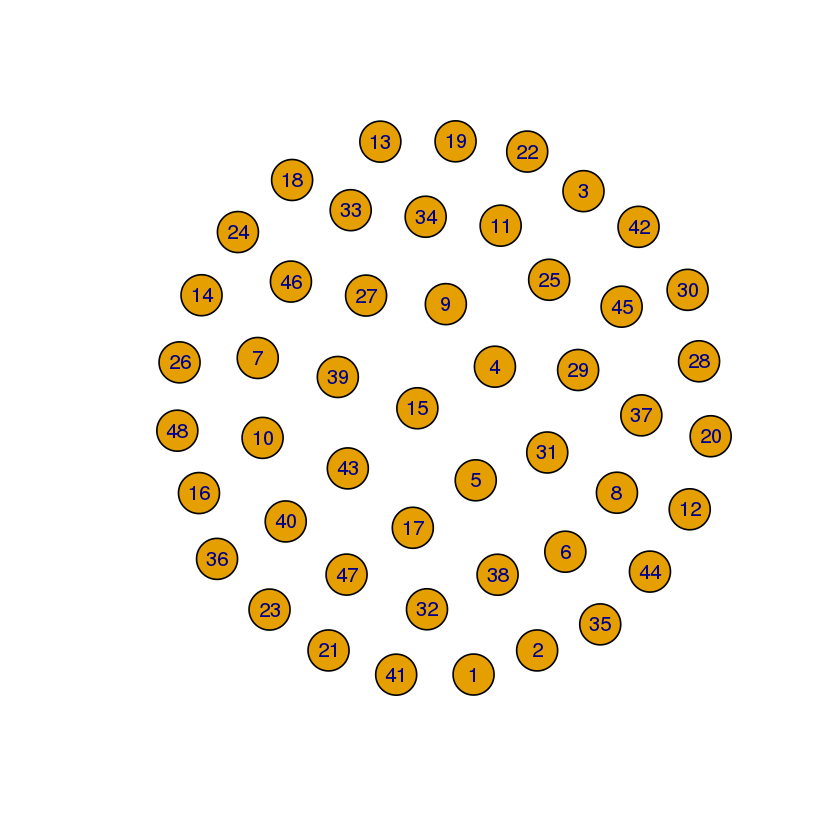

In [100]:
g0$segstats
plot(g0$G)

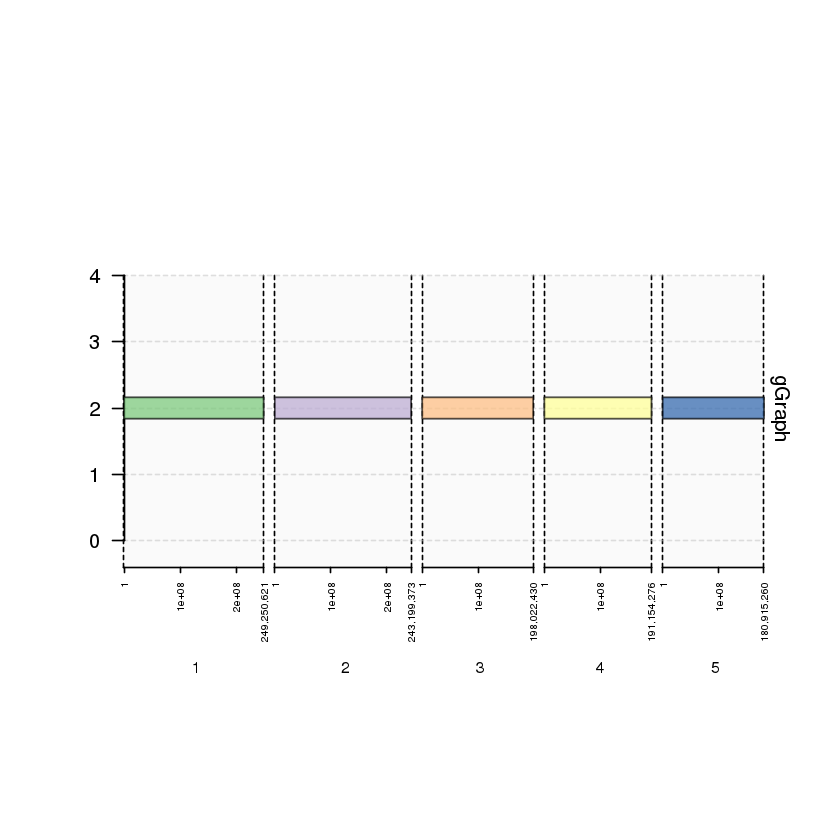

In [98]:
plot(g0$td, as.character(1:5), y.name="CN",gap=2e7,
     xaxis.chronly=T, xaxis.cex.tick=0.5, 
     y0=0, y1=4, ylab="CN",
     labels.suppress.grl=T, 
     gr.colorfield="seqnames")

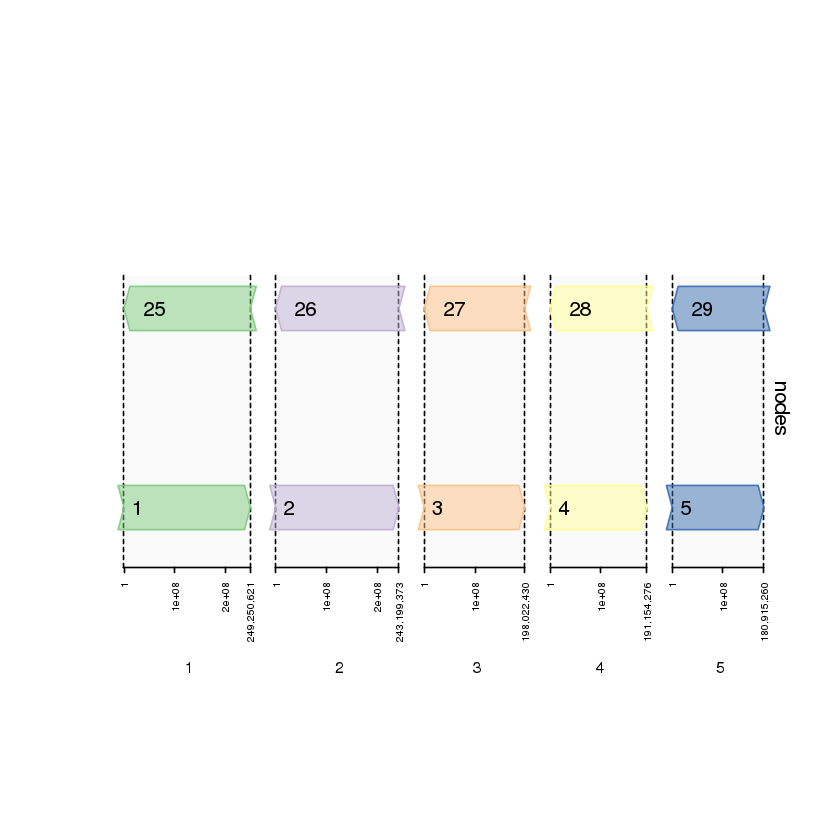

In [99]:
##png("/gpfs/commons/groups/imielinski_lab/home/yaox-934/public_html/plot.png", width = 1800, height = 900)
plot(gTrack(setNames(g0$segstats, seq_along(g0$segstats)), name="nodes"),
     as.character(1:5), gr.colorfield="seqnames",
     xaxis.chronly=T, xaxis.cex.tick=0.5, gap=5e7
    # , labels.suppress.grl=T
     , hadj.label=-1
     #, cex.label=0.75
    )
##dev.off()

In [23]:
jab = readRDS(system.file("extdata", "jabba.simple.rds", package = "gGnome"))
win = readRDS(system.file("extdata", "win_17.21.rds", package = "gGnome"))

In [93]:
gr.tostring(win, places = 2)
sl = seqlengths(g0$segstats)

[1] "chr17:52.4-54.34 MB"  "chr21:42.69-44.69 MB"

In [26]:
g1 = gGraph$new(jabba=jab)
g1

only use 'jabba' or 'weaver' field, not both


A gGraph object.
Based on reference genome: GENOME

Total non-loose segmentation:1025

Junction counts:
type
 aberrant     loose reference 
      350       310      1000 

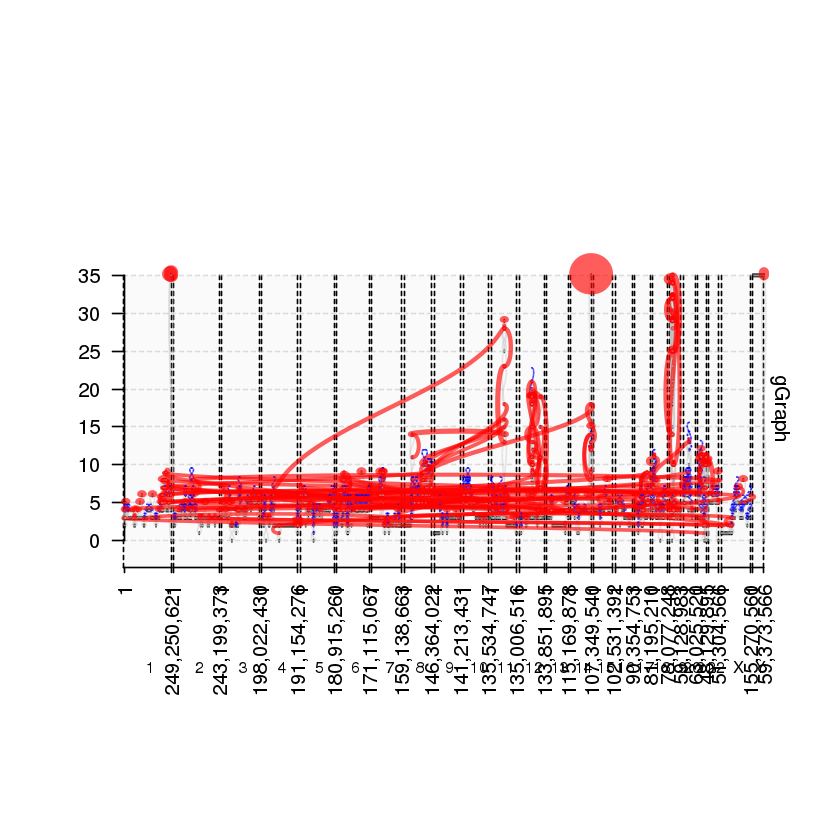

In [29]:
plot(g1$td, c(as.character(1:22),"X","Y"), xaxis.chronly=T, labels.suppress=T)

In [94]:
## extract subgraph involving only chr17 and chr21
chr_17.21 = si2gr(sl[c(17,21)]) ## GRanges of full length chr17, 21
g2 = g1$trim(chr_17.21)
plot(g2$td, chr_17.21, xaxis.chronly=T, labels.suppress=T)

ERROR: Error: subscript contains NAs or out-of-bounds indices


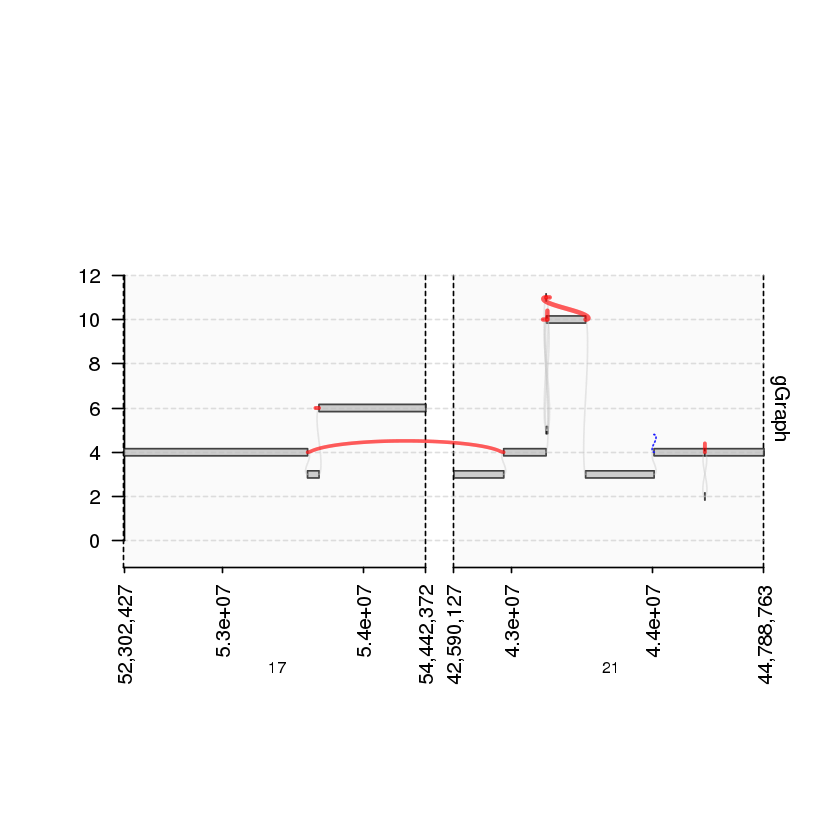

In [84]:
## An interesting interchromosomal rearrangement:
suppressWarnings(
    plot(g1$td, win+1e5, name="CN", xaxis.chronly=T, labels.suppress=T, gap=2e5)
                )

In [ ]:
## graph neighborhood within 1Mbp range from the chr17:52.4-54.34 MB
